In [1]:
import tensorflow as tf
import numpy as  np
from tensorflow.keras.datasets import mnist


(train_images,_), (test_images, _) = mnist.load_data()


train_images = train_images.astype(np.float32)/255.0
test_images = test_images.astype(np.float32)/255.0


train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))


class RBM:
  def __init__(self, visible_dim, hidden_dim):
    self.W = tf.Variable(tf.random.normal(shape=(visible_dim, hidden_dim)))
    self.visible_bias = tf.Variable(tf.zeros([visible_dim]))
    self.hidden_bias = tf.Variable(tf.zeros([hidden_dim]))

  def sample_hidden(self, visible):
    return tf.nn.sigmoid(tf.matmul(visible, self.W)+self.hidden_bias)

  def sample_visible(self, hidden):
    return tf.nn.sigmoid(tf.matmul(hidden, tf.transpose(self.W))+self.visible_bias)

  def CD(self, v0, k=1):
    for i in range(k):
      h0 = self.sample_hidden(v0)
      v1 = self.sample_visible(h0)
      h1 = self.sample_hidden(v1)

    pos = tf.matmul(tf.transpose(v0), h0)
    neg = tf.matmul(tf.transpose(v1), h1)

    new_W = pos - neg
    new_vis_bias = tf.reduce_mean(v0 - v1, axis=0)
    new_hidd_bias = tf.reduce_mean(h0 - h1, axis=0)

    self.W.assign_add(0.1 * new_W)
    self.visible_bias.assign_add(0.1 * new_vis_bias)
    self.hidden_bias.assign_add(0.1 * new_hidd_bias)


visible_dim = train_images.shape[1]
hidden_dim = 128

rbm = RBM(visible_dim, hidden_dim)

epochs = 10
batch_size = 128
batches = train_images.shape[0] // batch_size

for i in range(epochs):
  for j in range(batches):
    batch_data = train_images[j*batch_size : (j+1) * batch_size]
    rbm.CD(batch_data)
  print("Epoch {}/{} completed".format(i + 1, epochs))


11490434/11490434 [==============================] - 23s 2us/step
Epoch 1/10 completed
Epoch 2/10 completed
Epoch 3/10 completed
Epoch 4/10 completed
Epoch 5/10 completed
Epoch 6/10 completed
Epoch 7/10 completed
Epoch 8/10 completed
Epoch 9/10 completed
Epoch 10/10 completed


In [2]:
n = 10
test_img = test_images[:n]
for i in range(10):
  image = test_img[i]
  image = image.reshape(-1, 784)
  for j in range(100):
    image = rbm.sample_visible(rbm.sample_hidden(image))

  resonstructed_image = image.numpy().reshape(28, 28)*255.0
  resonstructed_image = resonstructed_image.astype(np.int32)

In [3]:
import matplotlib.pyplot as plt

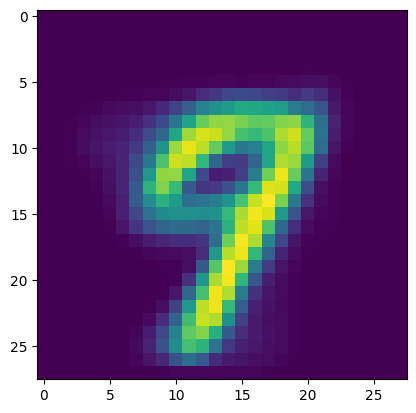

In [15]:
plt.imshow(resonstructed_image)
plt.show()

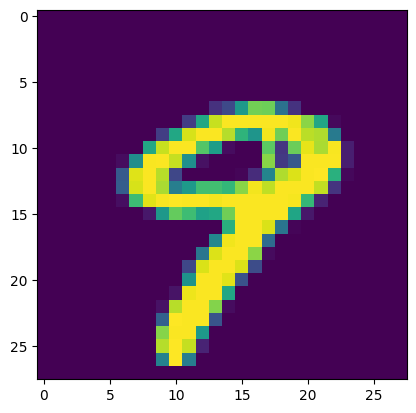

In [10]:
plt.imshow(test_images[9].reshape(28,28))
plt.show()